<a href="https://colab.research.google.com/github/UnknwonD/Python-MachineLearning/blob/main/YOLOv5_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터셋 불러오기
!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key=private_key)
project = rf.workspace("joseph-nelson").project("pistols")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 731.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=a9881d72ec281110055d97c751119cbe5542793526afea7ed609f2b2f61c1bf2
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypar

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Pistols-1 in yolov5pytorch:: 100%|██████████| 5945/5945 [00:01<00:00, 4344.91it/s]


In [2]:
# YOLOv5 깃허브 클론
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15045, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 15045 (delta 8), reused 5 (delta 1), pack-reused 15020
Receiving objects: 100% (15045/15045), 14.07 MiB | 14.61 MiB/s, done.
Resolving deltas: 100% (10307/10307), done.


In [3]:
# YOLOv5 모델에서 필요한 라이브러리 설치
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.2 MB/s eta 0:00:00


In [4]:
# 불러온 데이터 셋의 경로 확인
%cat /content/dataset/data.yaml

names:
- pistol
nc: 1
train: Pistols-1/train/images
val: Pistols-1/valid/images


In [6]:
%cd /
from glob import glob

img_list = glob('/content/dataset/export/images/*.jpg')
print(len(img_list))

/
2971


In [7]:
from sklearn.model_selection import train_test_split
train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)

print(len(train_img_list), len(val_img_list))

2376 595


In [8]:
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + "\n")

with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + "\n")

In [10]:
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['pistol'], 'nc': 1, 'train': 'Pistols-1/train/images', 'val': 'Pistols-1/valid/images'}
{'names': ['pistol'], 'nc': 1, 'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt'}


In [12]:
%cd /content/yolov5/

# YOLO의 학습 방법
# pretrained된 모델을 받아서 사용 ( yolov5s.pt)
# 결과는 runs에 저장됨
!python train.py --img 416 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name gun_yolov5s

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=gun_yolov5s, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-75-gb8a2c47 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anch

detect: weights=['/content/yolov5/runs/train/gun_yolov5s2/weights/best.pt'], source=/content/dataset/export/images/armas (1419)_jpg.rf.95747978dba3b2d590159b9bc4a124af.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-75-gb8a2c47 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/export/images/armas (1419)_jpg.rf.95747978dba3b2d590159b9bc4a124af.jpg: 416x416 1 pistol, 8.2ms
Speed: 0.3ms pre-process, 8.2ms inference, 1.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp3


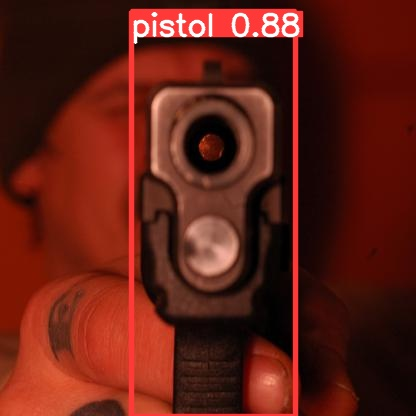

In [21]:
from IPython.display import Image
import os
# Inference 진행
val_img_path = val_img_list[2]
!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s2/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"
Image(os.path.join('runs/detect/exp3', os.path.basename(val_img_path)))

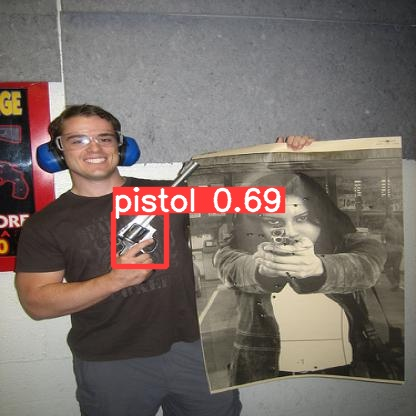

In [20]:
Image(os.path.join('runs/detect/exp', os.path.basename(val_img_path)))